c:\Users\joy_1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\joy_1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\joy_1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\joy_1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision 

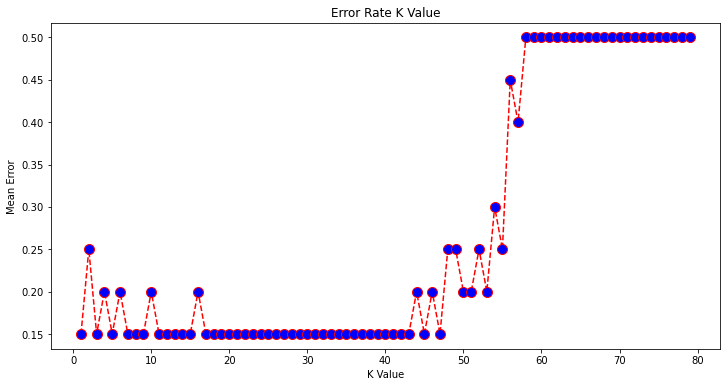

AccuracyScore -----  0.85
PrecisionScore ----- 0.8571428571428571
RecallScore/SENSIBILIDADE -----  1.0
F1Score ----- 0.8695652173913044
ERROR RATE K VALUE -----  0.15
K VALUE ----  46


In [1]:

####### JOYCE SANTOS DA SILVA RA: 211760

##IMPORTANDO PACOTES

from joblib.pool import np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score

##CARREGANDO DATASET

dados = pd.read_csv("hbat.csv")

##SEPARANDO X E Y

inputs = ['x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18']    
x = dados[inputs]
y = dados['x4'] # PODENDO VARIAR ENTRE X2, X3, X4 E X5

##SEPARANDO DADOS DE TREINO E TESTE
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)    
error = []  
arr_accuracyScore = []  
arr_precisionScore = []
arr_recallScore = []
arr_f1Score = []

##CRIANDO O MODELO KNN
for i in range(1, 80):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    arr_accuracyScore.append(accuracy_score(y_test, pred_i))
    arr_precisionScore.append(precision_score(y_test, pred_i ))
    arr_recallScore.append(recall_score(y_test, pred_i))
    arr_f1Score.append(f1_score(y_test, pred_i))

##PLOTANDO O GRÁFICO DE ERRO    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 80), error, color='red', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')   
plt.ylabel('Mean Error')
plt.show()


##PLOTANDO O GRÁFICO DE ACURÁCIA PRECISAO RECALL E F1
print('AccuracyScore ----- ',+max(arr_accuracyScore, key=float)) #Maior valor de accuracy score 
print('PrecisionScore -----',+max(arr_precisionScore, key=float)) #Maior valor de precision 
print('RecallScore/SENSIBILIDADE ----- ',+max(arr_recallScore, key=float)) #Maior valor de recall 
print('F1Score -----',+max(arr_f1Score, key=float)) #Maior valor de f1 



# ERROR RATE K VALUE
error = error = pd.Series(error)
print('ERROR RATE K VALUE ----- ',+error.min())


error_minimo = error[error==error.min()]
idx = error_minimo.index.max()
print('K VALUE ---- ',+idx)

        